In [46]:
import numpy as np
import pickle
import os
import nibabel as nib
import glob
from skimage import measure
from scipy import ndimage
import matplotlib.pyplot as plt


In [47]:
def read_mutant_txt(path):
    name_list = []
    fo = open(path)
    for line in fo:
        striped_line = line.strip('\n')
        if striped_line != '':
            name_list.append(striped_line)
    return name_list

def padded_minimum_size(label, min_size=(256,192,160)):
    img_size = np.shape(label)
    x_offset = max(0, round((min_size[0]-img_size[0])/2))
    y_offset = max(0, round((min_size[1]-img_size[1])/2))
    z_offset = max(0, round((min_size[2]-img_size[2])/2))
        
    padded_label=np.zeros((max(img_size[0],min_size[0]),
                           max(img_size[1],min_size[1]),
                           max(img_size[2],min_size[2])),np.uint8)
    
    padded_label[x_offset:x_offset+img_size[0], 
                 y_offset:y_offset+img_size[1], 
                 z_offset:z_offset+img_size[2]] = label
    
    return padded_label
    
    


In [48]:
data_path1 = '/scratch/zq415/grammar_cor/isbi_2020/2seg-localization/data/all_data_bv_body_rotate'
part_body_path2 = './part_body.txt'
nii_save_path = './bv_body_nii'


In [49]:
files = glob.glob(data_path1 + '/*.nii')
part_body_names = read_mutant_txt(part_body_path2)


In [57]:
body_size = []
img_size = []
count = 0
skip_num = 0

for each_file in files:
    base_name = os.path.basename(each_file)
    if base_name[:-4] in part_body_names:
        skip_num += 1
        continue
#     if base_name[:-4] != '20180307_En1_E14p5_M1_Em3abv_body_label':
#         continue
#     print(base_name[:-4])
    
    label = nib.load(each_file)
    ori_label = np.uint8(label.get_data())
    label = np.uint8(ori_label > 0.5)
    
    label_component = measure.label(label)
    max_component = 1
    component_num = np.unique(label_component)
    for current_component in range(2,len(component_num)+1):
        if np.sum(label_component == current_component) > np.sum(label_component == max_component):
            max_component = current_component
    
    body_label = label_component == max_component
    
    
    body_slice = ndimage.find_objects(body_label)[0]
    body_size.append([body_slice[0].stop-body_slice[0].start,
                      body_slice[1].stop-body_slice[1].start,
                      body_slice[2].stop-body_slice[2].start])
    
    img_size.append(body_label.shape)
    
    body_centroid = np.round(ndimage.measurements.center_of_mass(body_label)).astype(int)
    
    label_cut = ori_label[max(body_centroid[0]-128,0):min(body_centroid[0]+128,img_size[count][0]),
                          max(body_centroid[1]-96 ,0):min(body_centroid[1]+96 ,img_size[count][0]),
                          max(body_centroid[2]-80 ,0):min(body_centroid[2]+80 ,img_size[count][0])]
    if np.sum(label_cut) < 1000:
        print('something wrong')
    
    
    padded_label_cut = padded_minimum_size(label_cut)
    print(count, ': ', body_size[count], img_size[count], 'skip_num: ', skip_num)
    count += 1
    print(label_cut.shape, padded_label_cut.shape)
    
    label_save_path = os.path.join(nii_save_path, base_name)
    
    padded_label_cut_nib = nib.Nifti1Image(padded_label_cut, np.eye(4))
    nib.save(padded_label_cut_nib, label_save_path)


0 :  [157, 98, 68] (259, 374, 355) skip_num:  0
(253, 192, 160) (256, 192, 160)
1 :  [152, 102, 79] (302, 417, 392) skip_num:  0
(256, 179, 160) (256, 192, 160)
2 :  [203, 147, 105] (363, 321, 286) skip_num:  0
(256, 192, 160) (256, 192, 160)
3 :  [84, 88, 60] (254, 190, 266) skip_num:  0
(244, 175, 160) (256, 192, 160)
4 :  [198, 127, 92] (346, 397, 311) skip_num:  0
(256, 192, 160) (256, 192, 160)
5 :  [203, 133, 119] (339, 474, 468) skip_num:  0
(256, 189, 160) (256, 192, 160)
6 :  [194, 135, 110] (300, 379, 344) skip_num:  0
(256, 192, 160) (256, 192, 160)
7 :  [188, 120, 109] (325, 371, 333) skip_num:  0
(256, 192, 160) (256, 192, 160)
8 :  [252, 172, 109] (369, 370, 230) skip_num:  0
(256, 192, 160) (256, 192, 160)
9 :  [247, 136, 111] (320, 339, 264) skip_num:  0
(256, 192, 160) (256, 192, 160)
10 :  [241, 136, 101] (305, 398, 333) skip_num:  0
(256, 163, 160) (256, 192, 160)
11 :  [195, 127, 100] (335, 392, 360) skip_num:  0
(256, 192, 160) (256, 192, 160)
12 :  [185, 141, 93] 

100 :  [118, 94, 72] (232, 244, 240) skip_num:  1
(232, 192, 160) (256, 192, 160)
101 :  [190, 131, 99] (359, 417, 352) skip_num:  1
(256, 192, 160) (256, 192, 160)
102 :  [147, 126, 95] (239, 369, 347) skip_num:  1
(232, 162, 148) (256, 192, 160)
103 :  [110, 83, 61] (202, 238, 245) skip_num:  1
(202, 192, 160) (256, 192, 160)
104 :  [179, 133, 113] (360, 418, 402) skip_num:  1
(256, 192, 160) (256, 192, 160)
105 :  [133, 106, 99] (215, 373, 367) skip_num:  1
(215, 130, 104) (256, 192, 160)
106 :  [165, 140, 112] (275, 292, 299) skip_num:  1
(251, 192, 160) (256, 192, 160)
107 :  [229, 181, 112] (340, 335, 222) skip_num:  1
(256, 192, 160) (256, 192, 160)
108 :  [187, 118, 113] (287, 286, 251) skip_num:  1
(247, 192, 160) (256, 192, 160)
109 :  [211, 137, 118] (286, 352, 342) skip_num:  1
(256, 192, 160) (256, 192, 160)
110 :  [126, 106, 79] (239, 253, 246) skip_num:  1
(239, 192, 160) (256, 192, 160)
111 :  [214, 147, 99] (406, 427, 279) skip_num:  1
(256, 192, 160) (256, 192, 160)
1

199 :  [155, 122, 88] (311, 328, 319) skip_num:  3
(256, 192, 160) (256, 192, 160)
200 :  [192, 128, 87] (325, 315, 356) skip_num:  3
(256, 192, 160) (256, 192, 160)
201 :  [194, 127, 88] (325, 393, 288) skip_num:  3
(256, 173, 160) (256, 192, 160)
202 :  [245, 153, 119] (305, 357, 357) skip_num:  3
(256, 192, 160) (256, 192, 160)
203 :  [230, 127, 126] (382, 456, 453) skip_num:  3
(256, 192, 160) (256, 192, 160)
204 :  [198, 119, 87] (347, 416, 326) skip_num:  3
(256, 192, 160) (256, 192, 160)
205 :  [175, 131, 116] (321, 346, 394) skip_num:  3
(256, 192, 160) (256, 192, 160)
206 :  [226, 155, 126] (278, 461, 448) skip_num:  3
(255, 137, 102) (256, 192, 160)
207 :  [135, 84, 63] (297, 367, 340) skip_num:  3
(256, 192, 160) (256, 192, 160)
208 :  [162, 144, 106] (279, 424, 395) skip_num:  3
(256, 126, 160) (256, 192, 160)
209 :  [162, 112, 105] (253, 337, 337) skip_num:  4
(239, 176, 160) (256, 192, 160)
210 :  [210, 138, 117] (262, 377, 364) skip_num:  4
(255, 163, 156) (256, 192, 160

298 :  [159, 106, 83] (292, 278, 323) skip_num:  9
(252, 192, 160) (256, 192, 160)
299 :  [97, 77, 61] (227, 219, 245) skip_num:  9
(226, 186, 160) (256, 192, 160)
300 :  [198, 137, 100] (327, 418, 331) skip_num:  9
(256, 192, 160) (256, 192, 160)
301 :  [186, 174, 108] (336, 468, 410) skip_num:  9
(256, 155, 160) (256, 192, 160)
302 :  [152, 114, 88] (316, 360, 315) skip_num:  9
(256, 192, 160) (256, 192, 160)
303 :  [223, 155, 106] (318, 351, 318) skip_num:  9
(256, 192, 160) (256, 192, 160)
304 :  [157, 103, 75] (262, 288, 206) skip_num:  9
(253, 192, 160) (256, 192, 160)
305 :  [209, 133, 119] (323, 309, 247) skip_num:  9
(256, 192, 160) (256, 192, 160)
306 :  [134, 116, 86] (253, 327, 328) skip_num:  9
(234, 179, 160) (256, 192, 160)
307 :  [246, 156, 106] (343, 421, 414) skip_num:  9
(256, 192, 160) (256, 192, 160)
308 :  [249, 168, 103] (371, 367, 227) skip_num:  9
(256, 192, 160) (256, 192, 160)
309 :  [202, 157, 105] (258, 218, 229) skip_num:  9
(250, 191, 160) (256, 192, 160)

396 :  [196, 137, 112] (345, 421, 410) skip_num:  13
(256, 192, 160) (256, 192, 160)
397 :  [113, 69, 53] (221, 241, 215) skip_num:  13
(221, 183, 160) (256, 192, 160)
398 :  [181, 115, 92] (274, 327, 319) skip_num:  13
(255, 192, 160) (256, 192, 160)
399 :  [213, 157, 126] (328, 414, 434) skip_num:  13
(256, 192, 160) (256, 192, 160)
400 :  [109, 97, 73] (252, 358, 352) skip_num:  13
(240, 178, 160) (256, 192, 160)
401 :  [171, 134, 109] (354, 361, 398) skip_num:  13
(256, 192, 160) (256, 192, 160)
402 :  [191, 135, 115] (372, 432, 380) skip_num:  13
(256, 192, 160) (256, 192, 160)
403 :  [188, 121, 87] (307, 376, 332) skip_num:  13
(256, 192, 160) (256, 192, 160)
404 :  [105, 76, 63] (229, 298, 296) skip_num:  13
(225, 192, 160) (256, 192, 160)
405 :  [224, 193, 114] (382, 412, 310) skip_num:  14
(256, 192, 160) (256, 192, 160)
406 :  [210, 146, 111] (345, 360, 233) skip_num:  14
(256, 192, 160) (256, 192, 160)
407 :  [205, 191, 136] (392, 510, 496) skip_num:  14
(256, 192, 160) (256

494 :  [205, 121, 115] (275, 328, 381) skip_num:  15
(256, 179, 160) (256, 192, 160)
495 :  [169, 122, 94] (254, 280, 262) skip_num:  15
(254, 192, 160) (256, 192, 160)
496 :  [198, 135, 114] (285, 435, 444) skip_num:  15
(256, 157, 160) (256, 192, 160)
497 :  [151, 107, 61] (207, 300, 275) skip_num:  15
(207, 158, 160) (256, 192, 160)
498 :  [229, 157, 115] (330, 362, 299) skip_num:  15
(256, 192, 160) (256, 192, 160)
499 :  [224, 160, 124] (314, 293, 371) skip_num:  15
(256, 192, 160) (256, 192, 160)
500 :  [188, 130, 108] (347, 385, 285) skip_num:  15
(256, 192, 160) (256, 192, 160)
501 :  [165, 95, 75] (243, 361, 341) skip_num:  15
(237, 174, 147) (256, 192, 160)
502 :  [193, 137, 112] (385, 464, 465) skip_num:  15
(256, 192, 160) (256, 192, 160)
503 :  [186, 161, 113] (339, 405, 392) skip_num:  15
(256, 192, 160) (256, 192, 160)
504 :  [202, 133, 107] (264, 292, 313) skip_num:  15
(249, 190, 160) (256, 192, 160)
505 :  [201, 141, 106] (295, 418, 443) skip_num:  15
(256, 151, 129) 

In [54]:
body_centroid[0] = 290

In [55]:
body_centroid.astype(int)

array([290, 156, 165])

In [22]:
print(max(body_centroid[0]-128,0), min(body_centroid[0]+128,img_size[0][0]))
print(max(body_centroid[1]-96 ,0), min(body_centroid[1]+96 ,img_size[0][1]))
print(max(body_centroid[2]-80 ,0), min(body_centroid[2]+80 ,img_size[0][2]))

23 279
0 120
172 332


In [45]:
np.uint8(259)

3

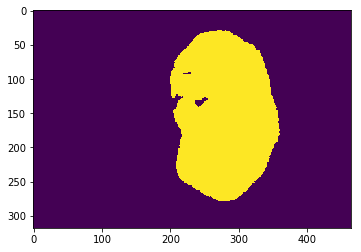

In [40]:
plt.imshow(label[:,:,252])

In [9]:
body_centroid

array([151,  24, 252], dtype=uint8)

In [ ]:
count=0
all_data={}
miss_img1=0
miss_img2=0
miss_img3=0
miss_name=[]
bv_ratio = []
size_min = 1000
size_max = 0

for folder1 in folder_list1:
    data_path2=os.path.join(data_path1,folder1)
    folder_list2=os.listdir(data_path2)
    folder_list2=[x for x in folder_list2 if not x.startswith('.')]
    for folder2 in folder_list2:
        data_path3=os.path.join(data_path2,folder2)
        folder_list3=os.listdir(data_path3)
        folder_list3=[x for x in folder_list3 if (not x.endswith('labels.nii') and not x.startswith('.')
                                                 and not x.endswith('filtered.nii'))]
        for folder3 in folder_list3:
            data_path4=os.path.join(data_path3,folder3)
            #filtered_path=data_path4[:-4] + '.nii'#'_filtered.nii'
            label_path = os.path.join(data_path4[:-4] + '_BV_labels.nii')
            
            img = nib.load(data_path4)
            img = np.float32(img.get_data())

#             filtered_img = nib.load(filtered_path)
#             filtered_img = np.float32(filtered_img.get_data())
            label = nib.load(label_path)
            label = np.uint8(label.get_data())
#             if np.shape(img) != np.shape(label) or np.shape(img) != np.shape(filtered_img):
#                 miss_img1+=1
#                 miss_name.append(data_path4)
#                 continue
#             if np.shape(img)[0] < 80 or np.shape(img)[1] < 80 or np.shape(img)[2] < 80:
#                 miss_img2+=1
#                 miss_name.append(data_path4)
#                 continue
#             if np.sum(label) <6000:
#                 miss_img3+=1
#                 miss_name.append(data_path4)
#                 continue

            all_data[count]=(data_path4,label_path)
            count+=1
            print(count,'  ',np.shape(img),'  ',np.shape(label),'  ',miss_img1, '  ',
                  miss_img2,'  ', miss_img3,'  ', data_path4)
            #bv_ratio.append(np.sum(label)/(np.prod(np.shape(img))+0.00001))
            #print('bv ratio: {}'.format(bv_ratio[count-1]))
#             if min(np.shape(img)) < size_min:
#                 size_min = min(np.shape(img))
#             if max(np.shape(img)) > size_max:
#                 size_max = max(np.shape(img))

In [ ]:
save_name = 'All_2test_data_path.pickle'
save_file = open(os.path.join(os.getcwd(),'data',save_name),'wb')
pickle.dump(all_data,save_file)
save_file.close()

In [ ]:
print('min_size: {}, max_size: {}'.format(size_min, size_max))

In [ ]:
file_path = os.path.join(os.getcwd(),'data',save_name)
with open(file_path,'rb') as f:
    data_dic = pickle.load(f)
f.close()

In [ ]:
print(data_dic)

In [ ]:
avg_bv_ratio = 0
for i in range(len(bv_ratio)):
    avg_bv_ratio += bv_ratio[i]
avg_bv_ratio /= len(bv_ratio)
print(avg_bv_ratio)

In [ ]:
np.unique(img)